# Tarea Semanal N°4 bis

### Autor: Gonzalo Goumaz

## Consigna
Se pide diseñar un filtro pasa banda que cumpla con los siguientes requisitos de plantilla:

$fpi = 1600kHz$

$fps = 2500kHz$

$fsi = 1250kHz$

$fss = 3200kHz$

$\alpha_{min} = 3dB$

$\alpha_{max} = 20dB$

$k = 10dB$

El filtro debe diseñarse para máxima planicidad.

a) Obtener la función transferencia
b) Realizar el diagrama de polos y ceros
c) Graficar la respuesta en frecuencia
d) Sintetizar el filtro utilizando estructuras Ackerberg-Mossberg.

## Desarrollo del filtro
En el siguiente PDF se desarrolla el filtro pedido.
Aclaración: A la hora de armar la plantilla, se interpreta que $\alpha_{min}$ y $\alpha_{max}$ se miden respecto del valor de la banda de paso. 

In [1]:
from IPython.display import IFrame
IFrame("./Pasabanda.pdf", width = 900, height = 900)

## Simulación en Python
Con la finalidad de corroborar los resultados obtenidos, se realiza un script de python que obtiene la transferencia a partir de los datos de plantilla.

Orden del filtro:  3


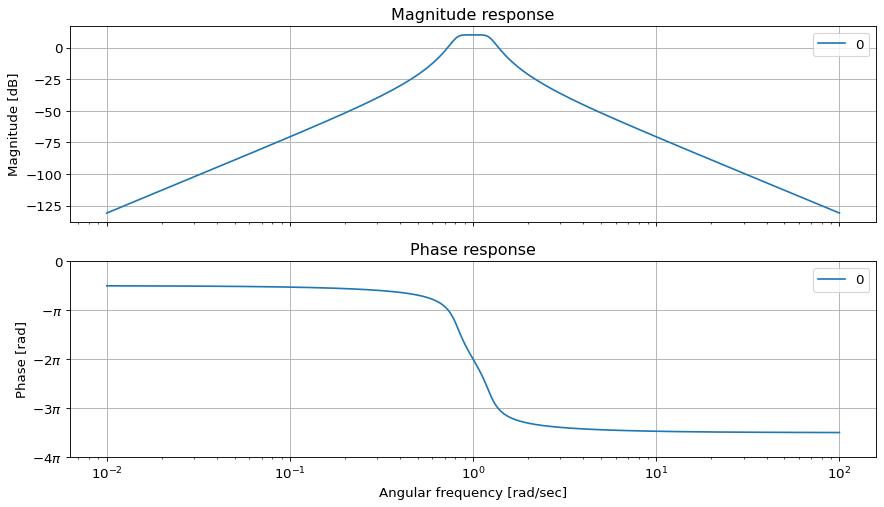

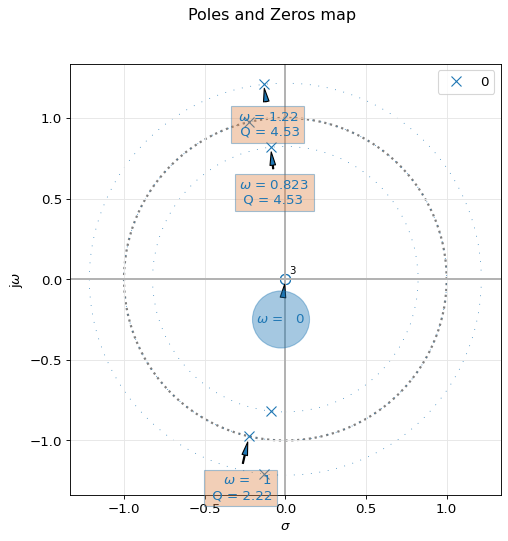

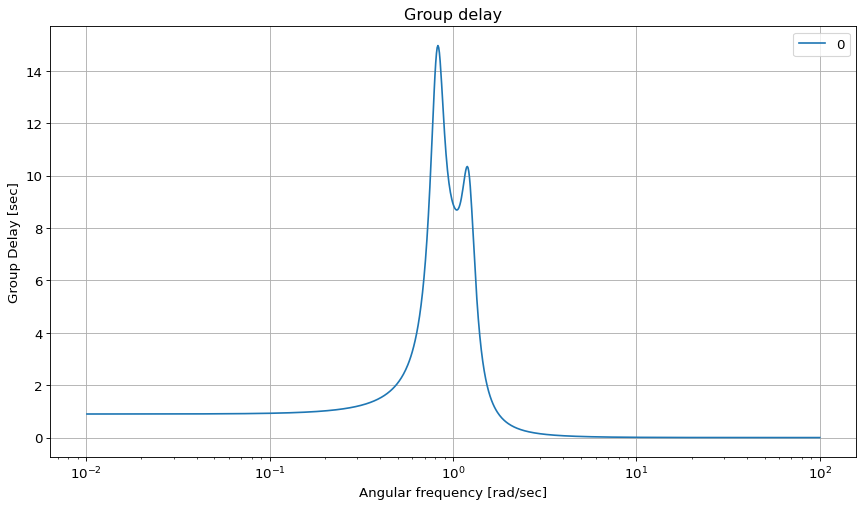

In [10]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2
import math as m

# Para fijar el estilo de gráficos en el notebook

fig_sz_x = 13
fig_sz_y = 7
fig_dpi  =  80
fig_font_size = 12

plt.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
plt.rcParams['figure.dpi'] = (fig_dpi)
plt.rcParams.update({'font.size':fig_font_size})


# Nucleo de transformacion en frecuencia
def w2Omega(w, BW):
    
    Omega = abs((w**2-1)/(w*BW))
    
    return Omega

# Requisitos de plantilla

fpi = 1600e3       # [Hz]
fps = 2500e3       # [Hz]
fsi = 1250e3       # [Hz]
fss = 3200e3       # [Hz]
alpha_max = 3      # [dB]
alpha_min = 20     # [dB]
k_db = 10          # [dB]

k = 10**(k_db/20)
f0 = m.sqrt(fpi*fps)

# Normalización de frecuencia
w0  = 1
wpi = fpi/f0
wps = fps/f0
wsi = fsi/f0
wss = fss/f0

BW = wps-wpi
Q = w0/BW

# Plantilla del pasabajos prototipo
Omega_p = 1
Omega_s = min(w2Omega(wsi, BW), w2Omega(wss, BW))

# El filtro es de 3db de atenuación en la banda de paso, por lo que es un butterworth 
ee = 1 # epsilon ** 2

# Determino el órden del filtro
n = m.log((10**(alpha_min/10)-1)/ee,Omega_s)/2
# Redondeo hacia el primer entero mayor
n = m.ceil(n)

print("Orden del filtro: ", n)

z_lp, p_lp, k_lp = sig.buttap(n)
tf_lp = sig.zpk2tf(z_lp, p_lp, k_lp)

# Hago la transformación lp-bp
num, den = sig.lp2bp(tf_lp[0], tf_lp[1], w0, BW)
tf_bp = sig.TransferFunction(k*num, den) # Multiplico por K para tener la ganancia pedida

plt.close("all")

tc2.analyze_sys(tf_bp)

## Implementación y simulación circuital
A continuacion puede verse una implementación utilizando las estructuras Ackerberg-Mossberg y una simulación en LTspice.
<img src="Red_Spice_BP.png">
<img src="Sim_Spice_BP.png">